In [1]:
import pickle
import pandas as pd

import sys, os
from pathlib import Path
# signalfuncなどのある親ディレクトリのパスを取得,これはJupyter系特有の書き方
current_dir = os.path.join(Path().resolve())
# モジュールのあるパスを追加
sys.path.append(str(current_dir) + '/../')

from sklearn.preprocessing import StandardScaler

import ml_modules as mm

In [2]:
df_train_data = pd.read_csv('../data/wine_train.csv')
df_train_data = pd.get_dummies(df_train_data)

x = df_train_data[list(set(df_train_data.columns)-set(['type_W','type_R','quality','quality_range']))]
# y = df_train_data['quality_range']
y = df_train_data['quality']

In [3]:
df = pd.read_csv('../data/wine_test.csv')

In [4]:
del df['type']

In [25]:
filename = '../model/rm_multico_voting_model.pickle'

In [26]:
with open(filename, mode='rb') as fp:
    knn = pickle.load(fp)

/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [27]:
X_test = pd.read_csv('../data/X_test.csv', header=0, index_col=0)
y_test = pd.read_csv('../data/y_test.csv',names=('l'))

In [28]:
X_test.drop(['total.sulfur.dioxide','residual.sugar'], axis=1, inplace=True) # alcholと相関が強いので除外してみる

Model Performance metrics:
------------------------------
Accuracy:  64.18% 
Precision: 64.20% 
Recall:    64.18% 
F1 Score:  62.84% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.62      0.75      0.68       473
           7       0.65      0.46      0.54       200
           5       0.68      0.70      0.69       351
           8       0.73      0.34      0.47        32
           4       0.62      0.13      0.22        38
           3       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         0

   micro avg       0.64      0.64      0.64      1100
   macro avg       0.47      0.34      0.37      1100
weighted avg       0.64      0.64      0.63      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                      
                   6   7    5   8  4  3  9
Actual: 6        354  36   80   3  0  0  0
        7        1

/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samp

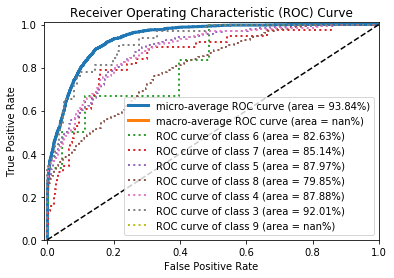

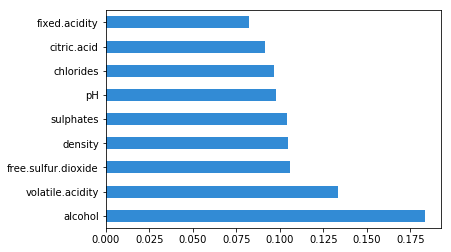

In [29]:
results = mm.get_results(knn
                         , 'knn', X_test, y_test['l'], target_labels = y.unique(), target_names=[str(x) for x in y.unique()], reasume=True)

In [30]:
ss = StandardScaler()
df = pd.DataFrame(columns=df.columns,data=ss.fit_transform(df))

In [31]:
df.drop(['total.sulfur.dioxide','residual.sugar'], axis=1, inplace=True) # alcholと相関が強いので除外してみる

KeyError: "['total.sulfur.dioxide' 'residual.sugar'] not found in axis"

In [32]:
ans = pd.DataFrame(knn.predict(df), columns=['predict'])

In [33]:
ans_review = pd.DataFrame(ans['predict'].value_counts())

In [34]:
ans_review['per'] = ans_review['predict'] / 1000

In [35]:
ans_review

,predict,per
6,553,0.553
5,404,0.404
7,39,0.039
8,3,0.003
9,1,0.001


In [22]:
base = pd.DataFrame(df_train_data['quality'].value_counts())

In [23]:
base['per']=base['quality']/len(df_train_data)

In [24]:
base

,quality,per
6,2410,0.438421
5,1793,0.326178
7,910,0.165545
4,184,0.033473
8,170,0.030926
3,25,0.004548
9,5,0.000910


In [74]:
# ans.to_csv('fix_multico_predict.csv')